<a href="https://colab.research.google.com/github/sijojoy186/LearnPython/blob/main/Projects/AustoAutomobiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Austo Automobiles Case Study**

## Exploratory Data Analysis for Extracting Insights



---



## **Data Overview**


The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

**Importing the libraries**




In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the data**


In [41]:
df = pd.read_csv('/content/austo_automobile.csv')


**Check the structure of the data**

In [42]:
df.head()


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [43]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [44]:
df.sample()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1404,23,Male,Salaried,Married,Post Graduate,2,No,No,Yes,58600,600.0,59200,20000,Hatchback


**Shape of the dataset**


In [45]:
df.shape

(1581, 14)

*The dataset has 1581 rows and 14 columns*

**Types of Data**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


*The dataset has 6 numrical and 8 categorical columns*

**Check Duplicate / Missing values**


In [47]:
df.duplicated().sum()

np.int64(0)

*There are no duplicated rows*

In [48]:
df.isnull().sum()

,0
Age,0
Gender,53
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


- *The variable `Gender` and `PartneF_salary` have 53 and 106 missing values in them*
- *There are no missing values in other variables*

**Statistical Summary**

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


**Treating missing values**

In [50]:
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [51]:
df['Gender'].value_counts()

,count
Gender,
Male,1199
Female,327
Femal,1
Femle,1


In [52]:
# replace wrong female value with the correct value.
df['Gender'] = df['Gender'].replace('Femle', 'Female')
df['Gender'] = df['Gender'].replace('Femal', 'Female')


In [53]:
# fill nan values with mode value
df.fillna({'Gender': df['Gender'].mode()[0]}, inplace=True)


- *The Gender value of female corrected for 2 values*
- *The Gender value of nan values replaced wtih mode value*

In [54]:
df['Gender'].value_counts()

,count
Gender,
Male,1252
Female,329


In [55]:
# 1. Impute Partner_salary with 0 where Partner_working is 'No' and Partner_salary is missing.
df.loc[(df['Partner_working'] == 'No') & (df['Partner_salary'].isnull()), 'Partner_salary'] = 0


In [56]:
# 2. Impute Partner_salary using the formula (Total_salary - Salary) where Partner_working is 'Yes' and Partner_salary is missing.
# The formula is Partner_salary = Total_salary - Salary
df.loc[(df['Partner_working'] == 'Yes') & (df['Partner_salary'].isnull()), 'Partner_salary'] = df['Total_salary'] - df['Salary']

- *Imputed 0 for partner not working*
- *Imputed Total sal - salary for Partner salary*

In [57]:
df.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


- *All the missing values treated*

 **Observations and Insights**

In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,19233.776091,19670.391171,0.0,0.0,25100.0,38100.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


*   All the missing values and duplicates are
*   Data good to start with the further Analysis.
*   The buyers age is between 22 and 54.
*   The buyers dependent range from 0 to 4
*   The salary of the buyers range from 80k to 1.71 lakh
*   The price range between 18k to 70k









---



## **Univariate Analysis**

**Age**

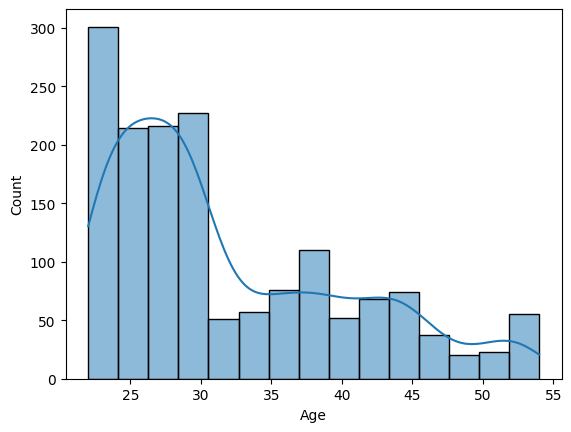

In [59]:
sns.histplot(data=df, x='Age',kde=True);


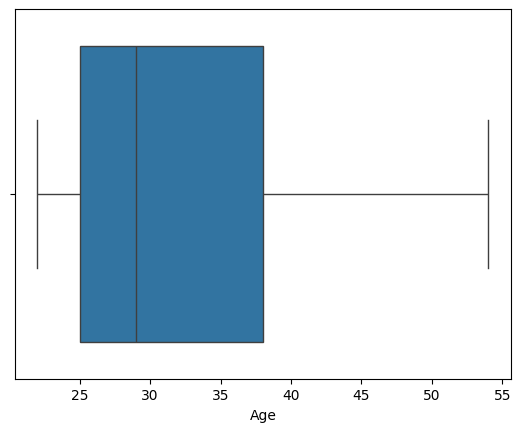

In [60]:

sns.boxplot(data=df, x='Age');

**Observations**
*   *Most of the buyers are of the range between 25 and 30*
*   *The data is right skewed*
*   *There are no outliers*
*   *Median Age is 29*


**Salary**

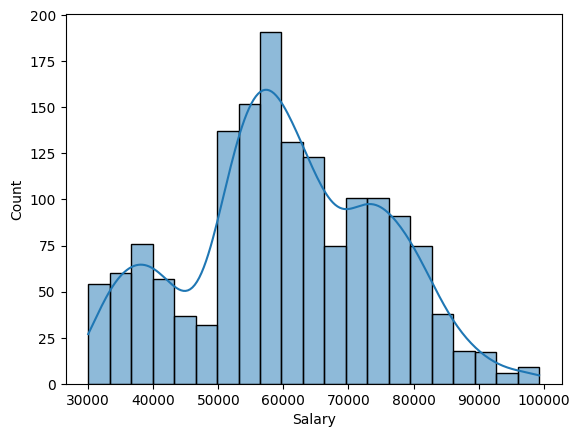

In [61]:
sns.histplot(data=df, x='Salary', kde=True);

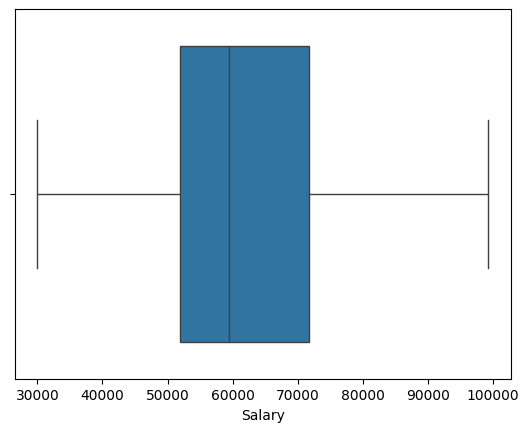

In [62]:
sns.boxplot(data=df, x='Salary');

**Observations:**
* *The distribution is not normal and few dips*
* *There are no outliers*
* *The median is ~60k

**Partner Salary**

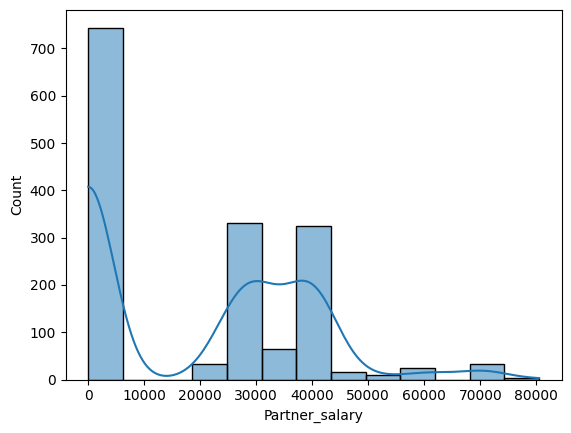

In [63]:
sns.histplot(data=df, x='Partner_salary', kde=True);

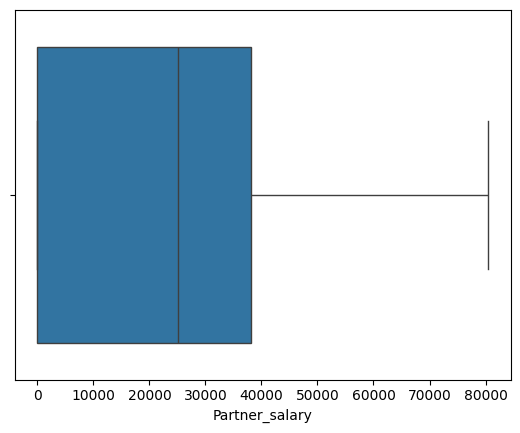

In [64]:
sns.boxplot(data=df, x='Partner_salary');

**Observations**
* *The distribution is right skewed*
* *Median Partner salary is 25k*

**Total Salary**

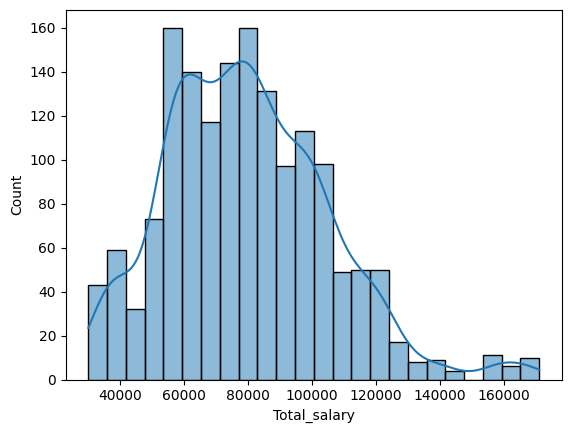

In [65]:
sns.histplot(data=df, x='Total_salary', kde=True);

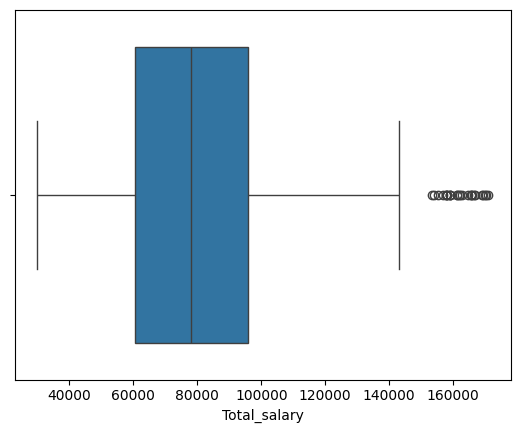

In [66]:
sns.boxplot(data=df, x='Total_salary');

**Observations**
* *Very few buyers have total salary beyond 1.2 lakh*
* *There are outliers*
* *The outliers are due to partner salary and high individual salary for few buyers.*



**Price**

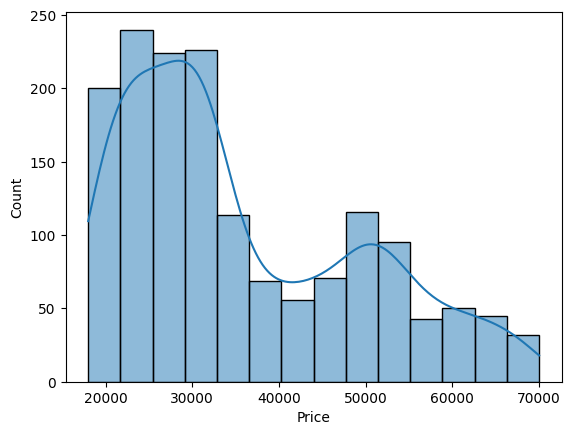

In [67]:
sns.histplot(data=df, x='Price', kde='true');

<Axes: xlabel='Price'>

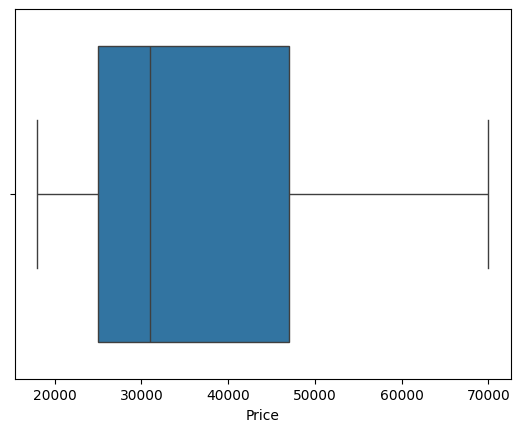

In [68]:
sns.boxplot(data=df, x='Price')

**Observations**
* *The maximum number of cars are price between 20k to 30k*
* *There is two peaks in the right skewed distribution data

**Gender**

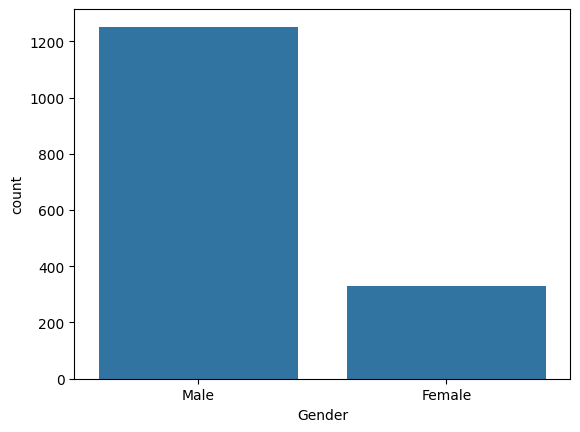

In [69]:
sns.countplot(data=df, x='Gender');

**Observations**
* *The maximum buyers are Male*

**Loan Types**

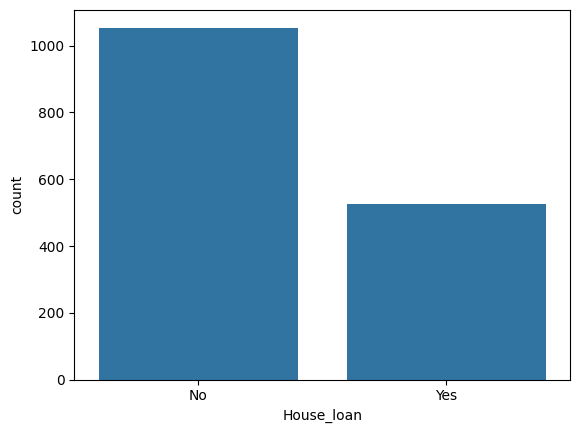

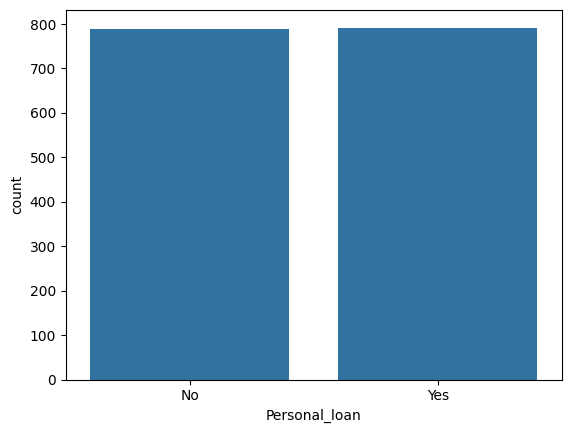

In [70]:
sns.countplot(data=df, x='House_loan')
plt.show()

sns.countplot(data=df, x='Personal_loan')
plt.show()

**Observations**
* *The buyers having a house-loan is half the buyers to those not having house loan.*
* *The buyers having personal-loan and not having are equal.*

**Make**

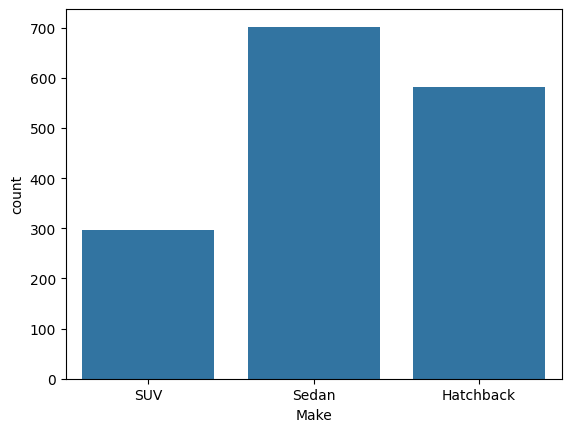

In [71]:
sns.countplot(data=df, x='Make');

*Sedan are the maximum make while SUV make is the least*

**Profession**

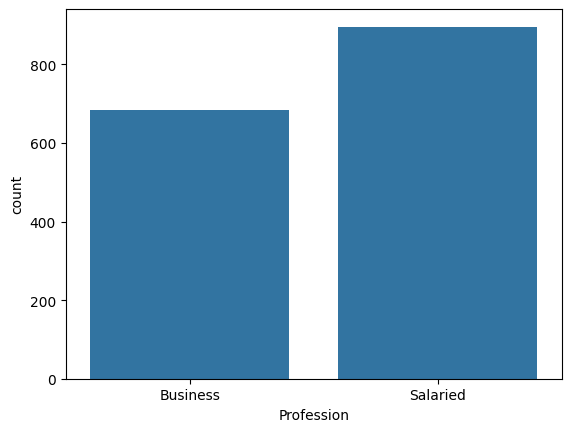

In [72]:
sns.countplot(data=df, x='Profession');

*Salaried buyers are more than business buyers*

**Working Partner**

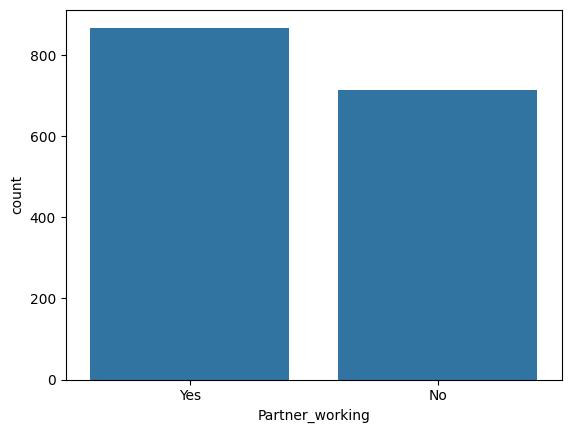

In [73]:
sns.countplot(data=df, x='Partner_working');

*Maximum buyers' partner are working*

**Dependents**

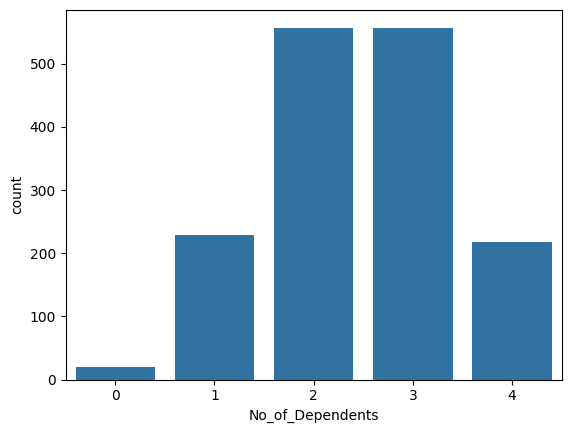

In [74]:
sns.countplot(data=df,x='No_of_Dependents');


*Most of the buyers have 2 to 3 dependents*

**Education**

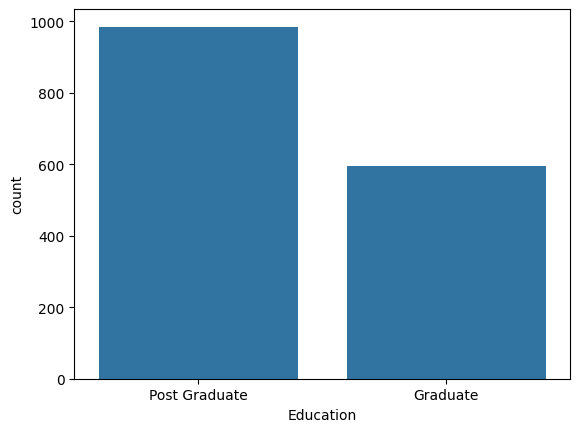

In [75]:
sns.countplot(data=df,x='Education');

*Most of the buyers are Post-Grad*

**Marital Status**

<Axes: xlabel='Marital_status', ylabel='count'>

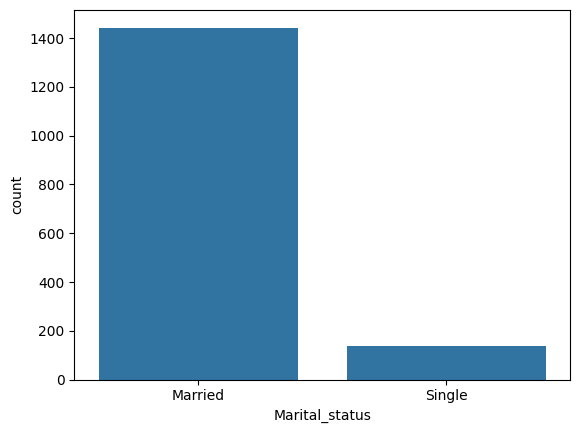

In [76]:
sns.countplot(data=df,x='Marital_status')

*Most of the buyers are Married*

## **Bivariate Analysis**

**Relationship between all numerical variables**

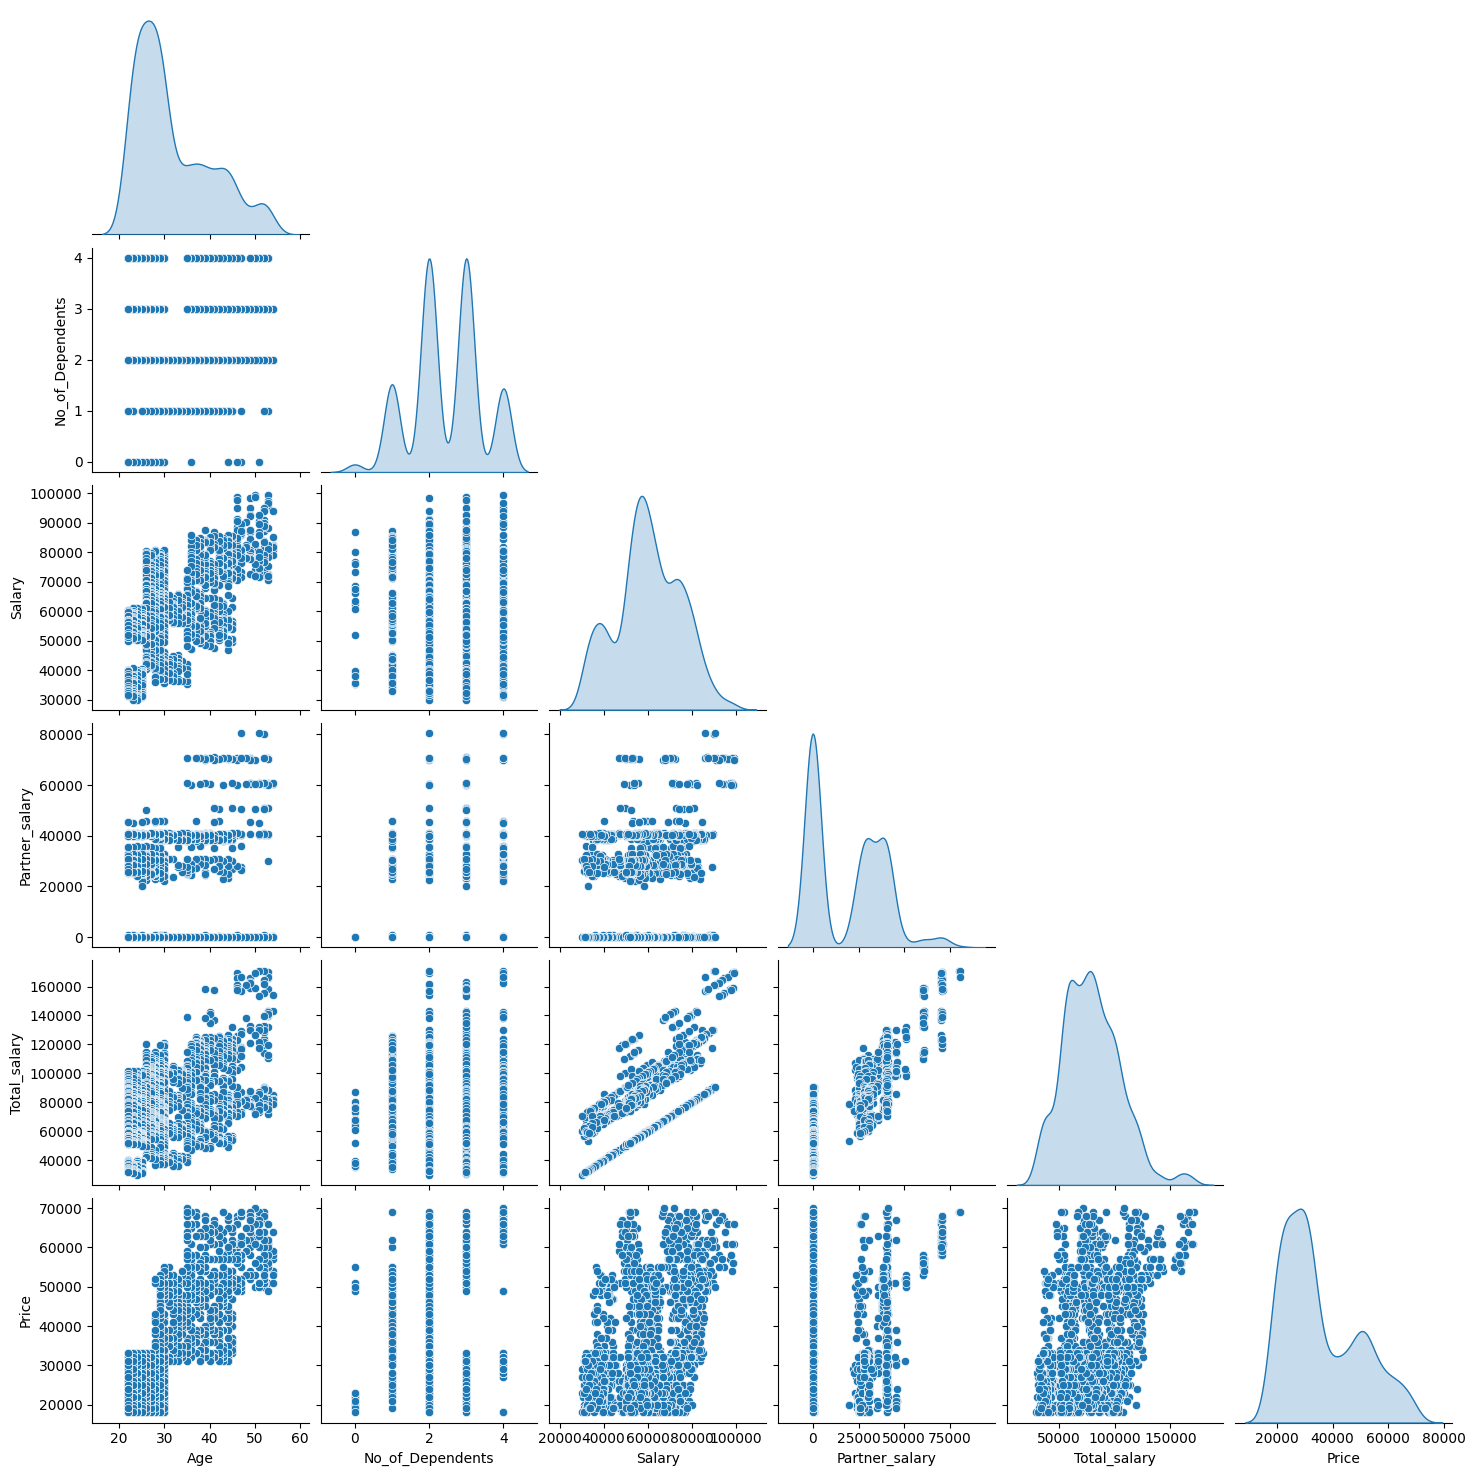

In [97]:
sns.pairplot(data=df, diag_kind="kde",corner=True);

In [102]:
df.corr(numeric_only=True)


,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Age,1.000000,-0.189614,0.616899,0.135702,0.458869,0.797831
No_of_Dependents,-0.189614,1.000000,-0.031746,0.144320,0.092890,-0.135839
Salary,0.616899,-0.031746,1.000000,0.087155,0.641560,0.409920
Partner_salary,0.135702,0.144320,0.087155,1.000000,0.820069,0.171875
Total_salary,0.458869,0.092890,0.641560,0.820069,1.000000,0.367823
Price,0.797831,-0.135839,0.409920,0.171875,0.367823,1.000000


<Axes: >

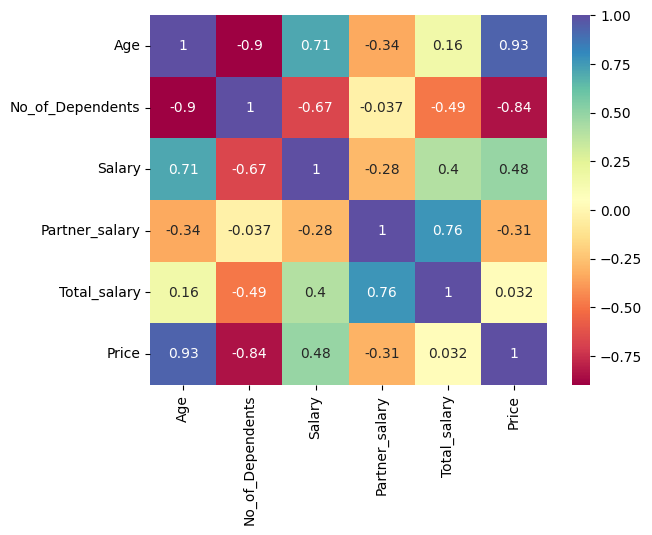

In [107]:
sns.heatmap(cor.corr(), annot=True, cmap='Spectral')

**Salary of Buyers based on Gender**

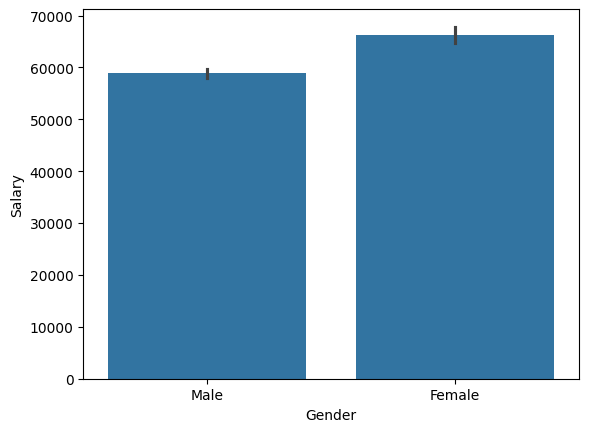

In [91]:
sns.barplot(data=df,y='Salary', x='Gender');

*Females Buyers have more salary*